#DT2470 Lab 01: Teh Signal Processings and Teh Machine Learnings

by Bob |. Sturm

In this lab you will practice some fundamental concepts of signal processing and machine learning.

In the first part, you will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc.

In the second part, you will build and test machine learning models to discriminate between two popular genres among silicon-based life. Here you will also write something intelligent about your work.

In any case, the lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., MATLAB, Processing, etc. But below I give tips for python. To be completely transparent, I didn't know much about python before writing this lab. So I learned as I went, making frequent use of the WWW for help. Here's some helpful links I used quite a bit:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html)
- [Scikit-learn API](https://scikit-learn.org/stable/)
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html)
- [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/)
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown)

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


---



# Part 1 Teh Signal Processing (Marcos)


1.   Choose an audio file to work with from http://bbcsfx.acropolis.org.uk. Load it and plot the resulting waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis must be in seconds. (Use the sample rate of your soundfile to find that.) If your audio file has more than one channel, just look at one channel.

In [0]:
# Install a python library for working with audio files, named pydub
!pip install pydub    

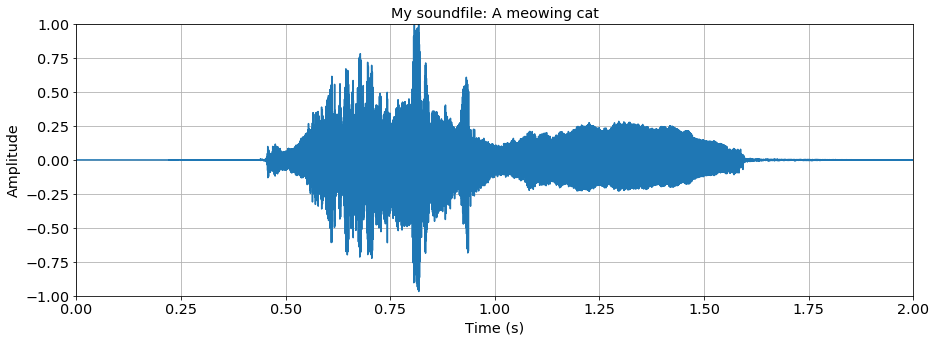

In [0]:
# Download an audio file
import os   # Interation with your operating system
snd_dir = '/tmp/snd'
if not os.path.exists(snd_dir):
  os.makedirs(snd_dir)
!wget --quiet -P /tmp/snd http://bbcsfx.acropolis.org.uk/assets/07045203.wav

# Now we plot the entire audio file
import pydub
import matplotlib.pyplot as plt
import numpy as np

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Load sound samples and plot them ...
sound = pydub.AudioSegment.from_file('/tmp/snd/07045203.wav', format='wav')
samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
normalized_samples = [(ele/2**16.)*2 for ele in samples] # Normalize the 16-bit track, samples is now normalized [-1,1]

if sound.channels > 1:
  samples_l = normalized_samples[::2]   # Left channel
  samples_r = normalized_samples[1::2]  # Right channel
  samples = samples_l                   # We look at left channel
  
fs = sound.frame_rate # Get the sampling frequency
Time = np.linspace(0, len(samples)/fs, num=len(samples)) # Create x values for x axis
#print(sound.duration_seconds)

# Plot and configure the chart
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('My soundfile: A meowing cat')
plt.grid(True)
plt.xlim([0,2])  # Set x axis range
plt.ylim([-1,1]) # Set y axis range
plt.plot(Time,samples)
plt.show()

2. With the audio file you have chosen, zoom into two different 25 ms portions that have audio data and plot them. 

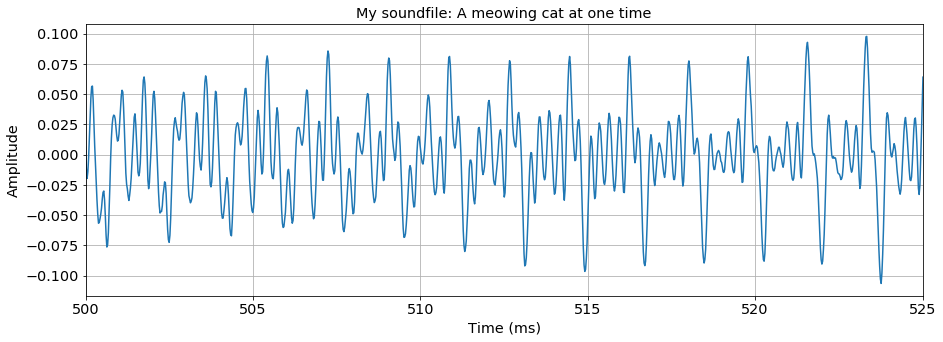

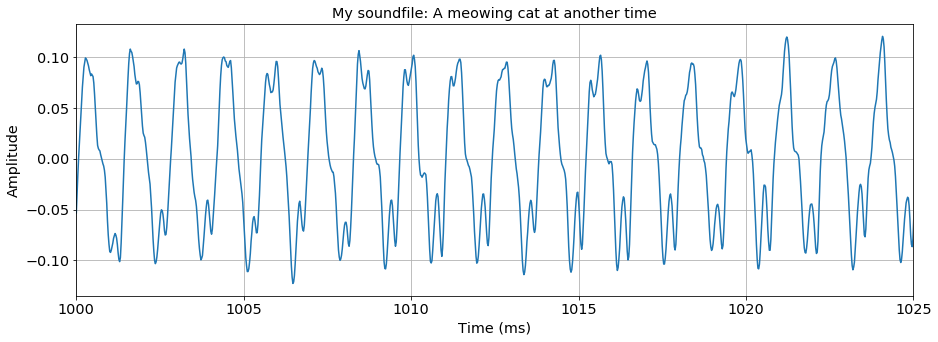

In [0]:
samples_1 = samples[22049:23152]
Time_1 = np.linspace(0.500, 0.500 + len(samples_1)/fs, num=len(samples_1)) # Create x values for x axis

samples_2 = samples[44099:45202]
Time_2 = np.linspace(1, 1 + len(samples_2)/fs, num=len(samples_2)) # Create x values for x axis


# Plot and configure the first chart
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('My soundfile: A meowing cat at one time')
plt.grid(True)
plt.xlim([0.500*1000,0.525*1000]) # Set x axis range
plt.plot(Time_1*1000,samples_1)
plt.show()

# Plot and configure the second chart
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('My soundfile: A meowing cat at another time')
plt.grid(True)
plt.xlim([1*1000,1.025*1000]) # Set x axis range
plt.plot(Time_2*1000,samples_2)
plt.show()

Taking a look at the figures shown above it is easy to predict different periodicities. However, despite the fact that both portions of the audio signal look completely different, they share one of their fundamental frequencies.\
\begin{align*}f_{1}=\frac{4~cycles}{5ms}=800 Hz;~
f_{2}=\frac{8~cycles}{10ms}=800 Hz\end{align*}


3. For each of the segments you looked at above, window them, and compute their Fourier transforms. Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to 5 kHz. Window with 1) boxcar, or 2) Hann. (This means you will have create four plots in total.)

In [0]:
# Install a python library for data mining and data analysis, named scikit-learn
!pip install scikit-learn 

In [0]:
from scipy import fft, arange
from scipy import signal
def fft_dB(samples,fs,window,bits_signal):
  ref = (2**bits_signal)/2 # Reference value
  n = len(samples) # Number of sample points
  k = arange(n)
  T = n/fs
  frq = k/T # Two sides frequency range
  frq = frq[range(n//2)] # One side frequency range

  samples_fft = fft(samples*window) # fft computing
  samples_fft = samples_fft[range(n//2)] # One side spectrum range
  samples_fft_dB = 20 * np.log10(np.abs(samples_fft)/ref)
  return samples_fft_dB, frq

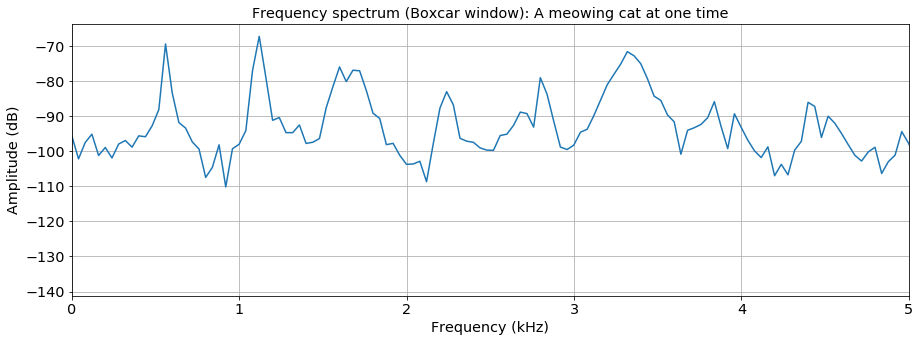

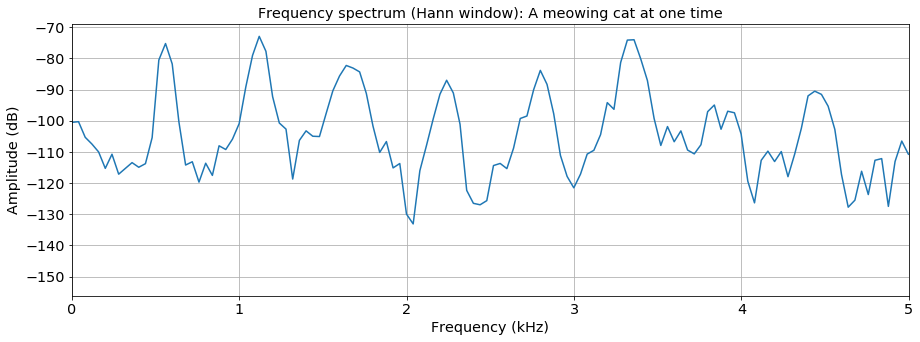

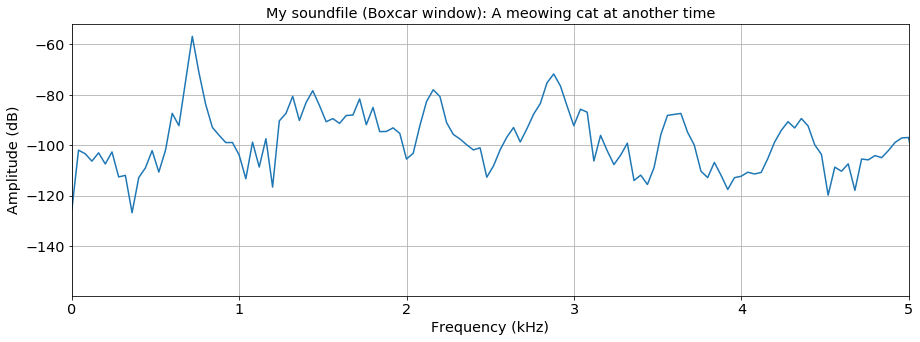

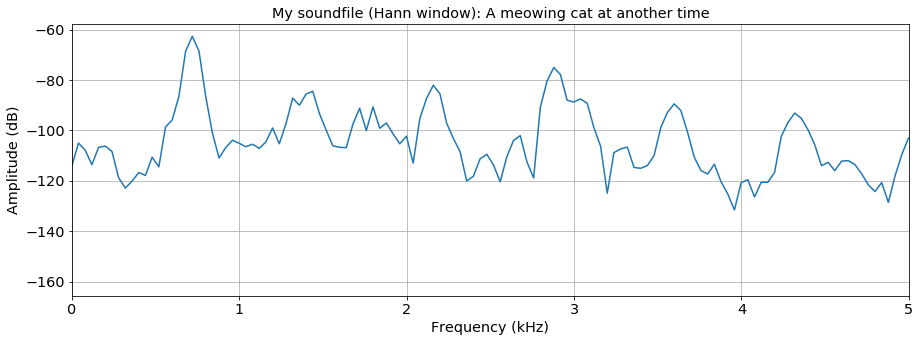

In [0]:
# First audio signal with boxcar window
window = signal.boxcar(len(samples_1))
samples_1_box_fft_dB,frq = fft_dB(samples_1,fs,window,16)
# Plot and configure the second chart
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dB)')
plt.title('Frequency spectrum (Boxcar window): A meowing cat at one time')
plt.xlim([0,5])
plt.grid(True)
plt.plot(frq/1000,samples_1_box_fft_dB)
plt.show()

# First audio signal with Hann window
window = signal.hann(len(samples_1))
samples_1_hann_fft_dB,frq = fft_dB(samples_1,fs,window,16)
# Plot and configure the second chart
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dB)')
plt.title('Frequency spectrum (Hann window): A meowing cat at one time')
plt.xlim([0,5])
plt.grid(True)
plt.plot(frq/1000,samples_1_hann_fft_dB)
plt.show()

# Second audio signal with boxcar window
window = signal.boxcar(len(samples_2))
samples_2_box_fft_dB,frq = fft_dB(samples_2,fs,window,16)
# Plot and configure the second chart
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dB)')
plt.title('My soundfile (Boxcar window): A meowing cat at another time')
plt.xlim([0,5])
plt.grid(True)
plt.plot(frq/1000,samples_2_box_fft_dB)
plt.show()

# Second audio signal with Hann window
window = signal.hann(len(samples_2))
samples_2_hann_fft_dB,frq = fft_dB(samples_2,fs,window,16)
# Plot and configure the second chart
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (dB)')
plt.title('My soundfile (Hann window): A meowing cat at another time')
plt.xlim([0,5])
plt.grid(True)
plt.plot(frq/1000,samples_2_hann_fft_dB)
plt.show()

As it is shown above, the fact of using a Hann window before computing the Fourier transform instead of a Boxcar window makes the result look smoother.

4. For your audio file, compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms. Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html).

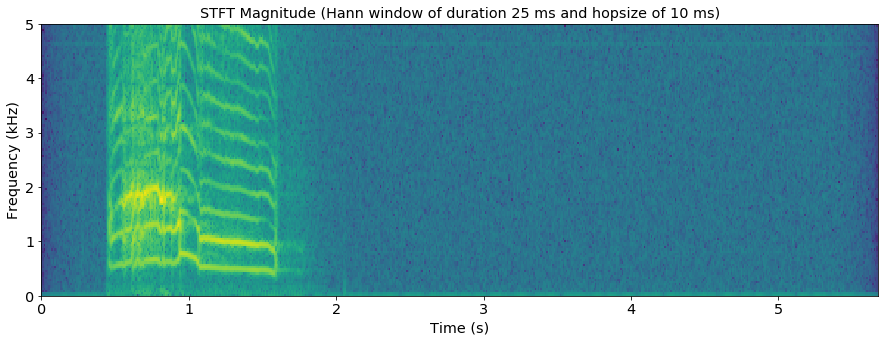

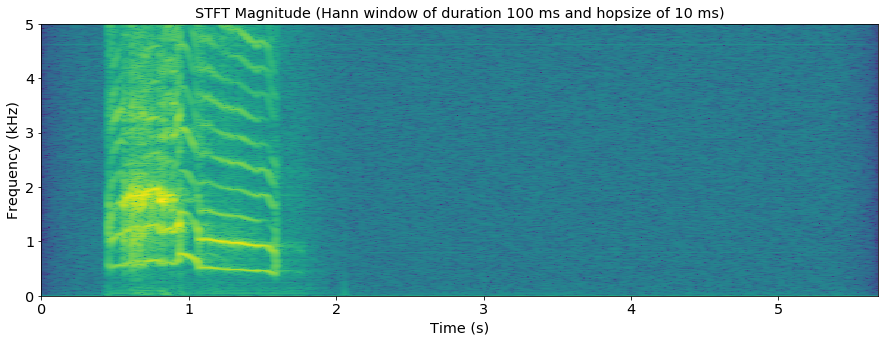

In [0]:
from scipy import signal

# STFT of the audio signal using Hann window of duration 25 ms and hopsize of 10 ms
f, t, samples_stft = signal.stft(samples, fs, window='hann', nperseg=0.025*fs, noverlap=(0.025-0.010)*fs) # stft computing
samples_stft_dB = 20 * np.log10(np.abs(samples_stft)/ref)
plt.pcolormesh(t, f/1000, samples_stft_dB)
plt.title('STFT Magnitude (Hann window of duration 25 ms and hopsize of 10 ms)')
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (s)')
plt.ylim([0,5])
plt.show()

# STFT of the audio signal using Hann window of duration 100 ms and hopsize of 10 ms
f, t, samples_stft = signal.stft(samples, fs, window='hann', nperseg=0.100*fs, noverlap=(0.100-0.010)*fs) # stft computing
samples_stft_dB = 20 * np.log10(np.abs(samples_stft)/ref)
plt.pcolormesh(t, f/1000, samples_stft_dB)
plt.title('STFT Magnitude (Hann window of duration 100 ms and hopsize of 10 ms)')
plt.ylabel('Frequency (kHz)')
plt.xlabel('Time (s)')
plt.ylim([0,5])
plt.show()


5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.

When it comes to the size of the window, there is a trade-off between time and frequency. Hence, the size of the window really depends on the application and what we are looking for.

Long windows --> good resolution in frequency but not in the time domain

Short windows --> good resolution in the time domain but not in frequency


---

# Part 2 Teh Machine Learnings (Marcos)

1. In this portion of the lab, you will work with audio recordings of two music genres: *kiki* and *bouba*. These genres are popular amongst the beings that inhabit the digital world. Download the zipfile from the Coursera lab 01 page, unzip, and upload to your Google drive. To use these in your session, adapt the following code:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


2. Write a function that will take in the samples of an audio file, a frame size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [0]:
# Ignoring any frames at the end of audio files that are less than that length.
def num_of_zero_crossings(samples, frame_size):
  frame_size = int(frame_size)
  num_of_chunks = math.floor(len(samples)/frame_size)
  crossings_count = np.zeros(num_of_chunks, dtype=np.int)
  
  for chunk_count in range(0,num_of_chunks):
    sample_start = chunk_count * frame_size
    sample_end = sample_start + frame_size
    #if sample_end > len(samples)-1:
    #  sample_end = len(samples)
    
    chunk = samples[sample_start:sample_end]
    #print(chunk)
    
    for frame_index in range(0,len(chunk)-1):
      if np.sign(chunk[frame_index]) != np.sign(chunk[frame_index+1]):
        crossings_count[chunk_count] += 1
        
  return crossings_count    

In [0]:
# Script to test if num_of_zero_crossings works properly
import math
import numpy as np

a = [-1,2,-3,4,-5,6,-7,8,-9,10,-11,12,-13,14,-15,16,-17]
num_of_zero_crossings(a,3)

array([2, 2, 2, 2, 2])

3. Using your function, compute zero crossing features for all kiki and bouba training and test samples using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a one-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like. !

In [0]:
# Install a python library for working with audio files, named pydub
!pip install pydub

In [0]:
# Script to test if num_of_zero_crossings works properly with an audio file
import pydub
import math

root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_train/kiki/kiki_0100.m4a')
samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples

if sound.channels > 1:
  samples_l = samples[::2]   # Left channel
  samples_r = samples[1::2]  # Right channel
  samples = samples_l # We look at left channel
  
fs = sound.frame_rate # Get the sampling frequency
frame_size_seconds = 0.1
num_of_zero_crossings(samples,fs*frame_size_seconds)

array([ 243,   78,   22,   16,   14,   14,   18,   12,   18,   22,  248,
         84,   20,   12,   16,   14,   18,   16,   16,  200,  122,   24,
         12,   14,   20,   22,   18,  176,  292,  146,   20,   32,   22,
         24,   89,  272,   48,   16,   16,   18,   22,  213,  134,   26,
         22,   14,   18,  255,   96,   20,   14,   22,  181,  141,   24,
         16,   14,  191,  200,   30,   24,  154,  194,   56,   18,  287,
        502,  202,  123,  483,  356,  108,  232,  104,   26,  266,   50,
        181,  141,  117,  177,  171,  822,  652,  338,  537,  567,  745,
        395,  100,  415,  661,  498,  565,  241, 1122, 1092, 1078,  571,
        216,  321,  557,  399,  130,  264, 1452, 1062, 1240, 1275,  907,
       1314, 1246, 1112,  839, 1304, 1210,  706,  808,  901,  631, 1370,
        414,  473,  612, 1004,  379,   55,   18,   26,  297, 1108,  696,
        248,  130,   31,  674, 1195,  454,  890, 1160,  998,  852,  644,
        647, 1458, 1315,  759,  888,  954,  993, 15

In [0]:
import pydub

root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
number_of_files = 100
# Kiki
kiki_zero_crossings_train = []
for i in range(1,number_of_files+1):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_train/kiki/kiki_' + f"{i:04d}" + '.m4a')
  print('Processing file kiki_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  kiki_zero_crossings_train = np.concatenate((kiki_zero_crossings_train,num_of_zero_crossings(samples,fs*frame_size_seconds)))
  #print(len(kiki_zero_crossings_train))

# Bouba
bouba_zero_crossings_train = []
for i in range(1,number_of_files+1):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_train/bouba/bouba_' + f"{i:04d}" + '.m4a')
  print('Processing file bouba_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  bouba_zero_crossings_train = np.concatenate((bouba_zero_crossings_train,num_of_zero_crossings(samples,fs*frame_size_seconds)))
  #print(len(bouba_zero_crossings_train))

In [0]:
# Save zero crossing results to a csv
if number_of_files == 100:
  np.savetxt(root_path + "Outputs/kiki_zero_crossings_train.csv", kiki_zero_crossings_train, delimiter=",")
  np.savetxt(root_path + "Outputs/bouba_zero_crossings_train.csv", bouba_zero_crossings_train, delimiter=",")

In [0]:
# Load zero crossing results from a csv
root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
kiki_zero_crossings_train = np.genfromtxt(root_path + "Outputs/kiki_zero_crossings_train.csv", delimiter=",")
bouba_zero_crossings_train = np.genfromtxt(root_path + "Outputs/bouba_zero_crossings_train.csv", delimiter=",")

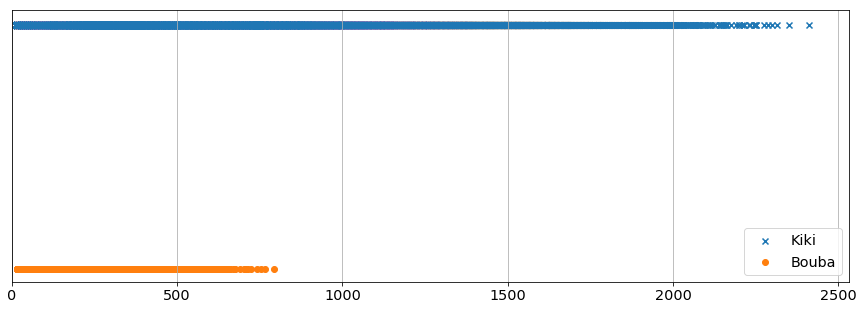

In [0]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(kiki_zero_crossings_train, 2*np.ones(len(kiki_zero_crossings_train),dtype=np.int), marker='x', label="Kiki")
ax.scatter(bouba_zero_crossings_train, np.ones(len(bouba_zero_crossings_train),dtype=np.int), label="Bouba")
ax.legend()
plt.gca().set_xlim(left=0)
ax.get_yaxis().set_ticklabels([])
ax.get_yaxis().set_ticks([])
plt.grid(axis='x')
plt.show()

4. The zero crossings of frames from audio files of each class can be modeled as probability distributions. Let's model the number of zero crossings as $z \in \mathbb{N}_0$ given genre $g \in \{\textrm{Kiki},\textrm{Bouba}\}$ as a Gaussian distribution:
$f_Z(z | g) = \frac{1}{\sqrt{2\pi \sigma_g^2}} e^{-\frac{(z-\mu_g)^2}{2\sigma_g^2}}$. Use unbiased maximum likelihood estimation to compute the parameters of the two distributions using your training observations. Plot these two distributions on top of your scatter plot. Remember, the unbiased maximum likelihood estimate of the mean of $N$ numbers $\{z_1, z_2, \ldots, z_N\}$is given by $\mu = \frac{1}{N}\sum_i z_i$, and the unbiased maximum likelihood estimate of the variance is given by $\sigma^2 = \frac{1}{N-1}\sum_i (z_i-\mu)^2$.



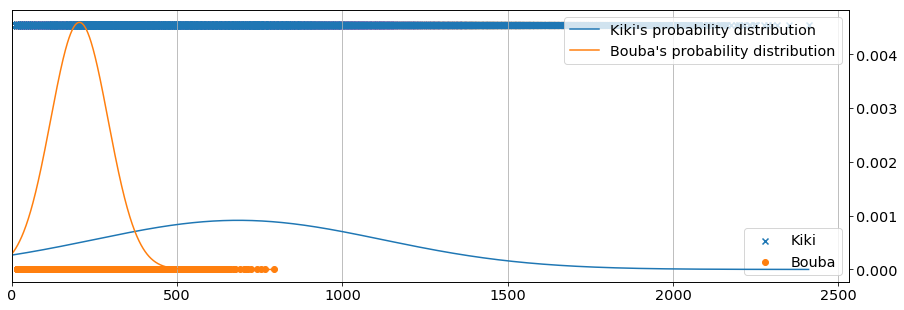

In [0]:
import math
def f_kiki(z):
  mean_kiki = 1/len(kiki_zero_crossings_train) * sum(kiki_zero_crossings_train)
  variance_kiki = 1/(len(kiki_zero_crossings_train)-1) * sum(((kiki_zero_crossings_train-mean_kiki)**2))
  return 1/math.sqrt((2*math.pi*variance_kiki)) * np.exp((-(z-mean_kiki)**2)/(2*variance_kiki))

def f_bouba(z):
  mean_bouba = 1/len(bouba_zero_crossings_train) * sum(bouba_zero_crossings_train)
  variance_bouba = 1/(len(bouba_zero_crossings_train)-1) * sum(((bouba_zero_crossings_train-mean_bouba)**2))
  return 1/math.sqrt((2*math.pi*variance_bouba))* np.exp((-(z-mean_bouba)**2)/(2*variance_bouba))

fig, ax1 = plt.subplots()
ax1.scatter(kiki_zero_crossings_train, 2*np.ones(len(kiki_zero_crossings_train),dtype=np.int), marker='x', label="Kiki")
ax1.scatter(bouba_zero_crossings_train, np.ones(len(bouba_zero_crossings_train),dtype=np.int), label="Bouba")
ax1.legend()
ax1.get_yaxis().set_ticklabels([])
ax1.get_yaxis().set_ticks([])
ax1.grid(axis='x')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

x_kiki = range(0,int(max(kiki_zero_crossings_train)))
x_bouba = range(0,int(max(bouba_zero_crossings_train)))
ax2.plot(x_kiki,f_kiki(x_kiki), label="Kiki's probability distribution")
ax2.plot(x_bouba,f_bouba(x_bouba), label="Bouba's probability distribution")
ax2.legend()
ax2.grid(axis='x')

plt.gca().set_xlim(left=0)
plt.show()

5. Using the Gaussian models of the two genres, compute the optimal decision boundary for a 0-1 loss, assuming equal priors. Essentially this means you want to find the value $z$ where $P(g=\textrm{Kiki}|z) = P(g=\textrm{Bouba}|z)$. (Hint: Use Bayes' rule.) Overlay that boundary on your plot of the two distributions. Comment on where that decision boundary is located, and why it makes sense.

Both curves intersect in x=372


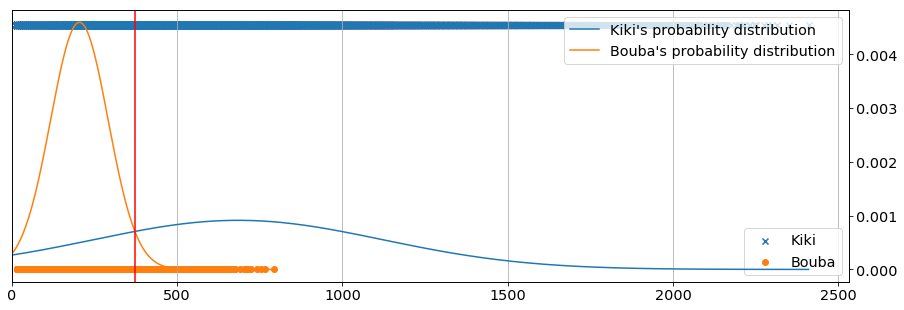

In [0]:
from scipy.optimize import fsolve

# Find the intersection of two curves given x[boundary] is x value where both curves intersect
x  = np.linspace(0, int(max(kiki_zero_crossings_train)),int(max(kiki_zero_crossings_train))+1)
y1 = f_kiki(x)
y2 = f_bouba(x)
boundary = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
print('Both curves intersect in x=' + str(int(boundary)))

fig, ax1 = plt.subplots()
ax1.scatter(kiki_zero_crossings_train, 2*np.ones(len(kiki_zero_crossings_train),dtype=np.int), marker='x', label="Kiki")
ax1.scatter(bouba_zero_crossings_train, np.ones(len(bouba_zero_crossings_train),dtype=np.int), label="Bouba")
ax1.legend()
ax1.get_yaxis().set_ticklabels([])
ax1.get_yaxis().set_ticks([])
ax1.grid(axis='x')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

x_kiki = range(0,int(max(kiki_zero_crossings_train)))
x_bouba = range(0,int(max(bouba_zero_crossings_train)))
ax2.plot(x_kiki,f_kiki(x_kiki), label="Kiki's probability distribution")
ax2.plot(x_bouba,f_bouba(x_bouba), label="Bouba's probability distribution")
ax2.legend()
ax2.grid(axis='x')

ax2.axvline(x[boundary],0,1,color='red')

plt.gca().set_xlim(left=0)
plt.show()

6. Now build your first Kiki-Bouba discriminator using that decision boundary, and test its performance on the training data, and on the testing data. Create a contingency table to summarize the results and comment. In this case, the contingency table is 2x2, where true is along the rows and predicted is along the columns. The diagonal will show correct classifications, while the off diagonal will show misclassifications:

In [0]:
# TESTING DATA Zero crossing calculation
import pydub

root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
number_of_files = 100
# Kiki
frame_size_seconds=1
kiki_zero_crossings_test = []
for i in range(101,101+number_of_files):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_test/kiki/kiki_' + f"{i:04d}" + '.m4a')
  print('Processing file kiki_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  kiki_zero_crossings_test = np.concatenate((kiki_zero_crossings_test,num_of_zero_crossings(samples,fs*frame_size_seconds)))
  #print(len(kiki_zero_crossings_test))

# Bouba
frame_size_seconds=1
bouba_zero_crossings_test = []
for i in range(101,101+number_of_files):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_test/bouba/bouba_' + f"{i:04d}" + '.m4a')
  print('Processing file bouba_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  bouba_zero_crossings_test = np.concatenate((bouba_zero_crossings_test,num_of_zero_crossings(samples,fs*frame_size_seconds)))
  #print(len(bouba_zero_crossings_test))

In [0]:
# TEST DATA Save zero crossing results to a csv
if number_of_files == 100:
  np.savetxt(root_path + "Outputs/kiki_zero_crossings_test.csv", kiki_zero_crossings_test, delimiter=",")
  np.savetxt(root_path + "Outputs/bouba_zero_crossings_test.csv", bouba_zero_crossings_test, delimiter=",")

In [0]:
# Load zero crossing results from a csv
kiki_zero_crossings_test = np.genfromtxt(root_path + "Outputs/kiki_zero_crossings_test.csv", delimiter=",")
bouba_zero_crossings_test = np.genfromtxt(root_path + "Outputs/bouba_zero_crossings_test.csv", delimiter=",")

In [0]:
# TRAINING DATA Load zero crossing results from a csv
kiki_zero_crossings_train = np.genfromtxt(root_path + "Outputs/kiki_zero_crossings_train.csv", delimiter=",")
bouba_zero_crossings_train = np.genfromtxt(root_path + "Outputs/bouba_zero_crossings_train.csv", delimiter=",")
kiki_predicted_correctly_train = sum(sum(kiki_zero_crossings_train.tolist() > boundary))
kiki_predicted_incorrectly_train = len(kiki_zero_crossings_train) - kiki_predicted_correctly_train
kiki_predicted_correctly_train_perc = round(kiki_predicted_correctly_train/len(kiki_zero_crossings_train)*100,2)
kiki_predicted_incorrectly_train_perc = round(kiki_predicted_incorrectly_train/len(kiki_zero_crossings_train)*100,2)
bouba_predicted_correctly_train = sum(sum(bouba_zero_crossings_train.tolist() <= boundary))
bouba_predicted_incorrectly_train = len(bouba_zero_crossings_train) - bouba_predicted_correctly_train
bouba_predicted_correctly_train_perc = round(bouba_predicted_correctly_train/len(bouba_zero_crossings_train)*100,2)
bouba_predicted_incorrectly_train_perc = round(bouba_predicted_incorrectly_train/len(bouba_zero_crossings_train)*100,2)

# TESTING DATA Load zero crossing results from a csv
kiki_zero_crossings_test = np.genfromtxt(root_path + "Outputs/kiki_zero_crossings_test.csv", delimiter=",")
bouba_zero_crossings_test = np.genfromtxt(root_path + "Outputs/bouba_zero_crossings_test.csv", delimiter=",")
kiki_predicted_correctly_test = sum(sum(kiki_zero_crossings_test.tolist() > boundary))
kiki_predicted_incorrectly_test = len(kiki_zero_crossings_test) - kiki_predicted_correctly_test
kiki_predicted_correctly_test_perc = round(kiki_predicted_correctly_test/len(kiki_zero_crossings_test)*100,2)
kiki_predicted_incorrectly_test_perc = round(kiki_predicted_incorrectly_test/len(kiki_zero_crossings_test)*100,2)
bouba_predicted_correctly_test = sum(sum(bouba_zero_crossings_test.tolist() <= boundary))
bouba_predicted_incorrectly_test = len(bouba_zero_crossings_test) - bouba_predicted_correctly_test
bouba_predicted_correctly_test_perc = round(bouba_predicted_correctly_test/len(bouba_zero_crossings_test)*100,2)
bouba_predicted_incorrectly_test_perc = round(bouba_predicted_incorrectly_test/len(bouba_zero_crossings_test)*100,2)
accuracy_test = round((kiki_predicted_correctly_test + bouba_predicted_correctly_test)/(len(kiki_zero_crossings_test)+len(bouba_zero_crossings_test))*100,2)

# Tables and results
print('Global accuracy test dataset ' + str(accuracy_test) + '%')
# TRAINING PERFORMANCE TABLE
print(tabulate([['Kiki true',str(kiki_predicted_correctly_train) + '(' + str(kiki_predicted_correctly_train_perc) + '%)',str(kiki_predicted_incorrectly_train) + '(' + str(kiki_predicted_incorrectly_train_perc) + '%)'],
                ['Bouba true',str(bouba_predicted_incorrectly_train) + '(' + str(bouba_predicted_incorrectly_train_perc) + '%)',str(bouba_predicted_correctly_train) + '(' + str(bouba_predicted_correctly_train_perc) + '%)']],
                headers=['TRAINING DATA','Kiki predicted', 'Bouba predicted']))
print()
# TESTING PERFORMANCE TABLE
print(tabulate([['Kiki true',str(kiki_predicted_correctly_test) + '(' + str(kiki_predicted_correctly_test_perc) + '%)',str(kiki_predicted_incorrectly_test) + '(' + str(kiki_predicted_incorrectly_test_perc) + '%)'],
                ['Bouba true',str(bouba_predicted_incorrectly_test) + '(' + str(bouba_predicted_incorrectly_test_perc) + '%)',str(bouba_predicted_correctly_test) + '(' + str(bouba_predicted_correctly_test_perc) + '%)']],
                headers=['TESTING DATA','Kiki predicted', 'Bouba predicted']))


Global accuracy test dataset 84.6%
TRAINING DATA    Kiki predicted    Bouba predicted
---------------  ----------------  -----------------
Kiki true        32749(71.02%)     13361(28.98%)
Bouba true       1459(2.73%)       52026(97.27%)

TESTING DATA    Kiki predicted    Bouba predicted
--------------  ----------------  -----------------
Kiki true       32002(69.96%)     13739(30.04%)
Bouba true      1758(3.2%)        53142(96.8%)


7. In the previous model, you created a classification system that worked on features computed from individual frames. Now you will create a new feature which will summarize the mean and variance of the features computed over several frames. For each continguous 1 second segment of an audio file (called a *texture window*), compute the mean and standard deviation of the zero crossings extracted from 100 ms frames in that segment. The resulting features will be two-dimensional vectors. Create a scatter plot of these features extracted from the training data. Mine looks like the below. ![My 2D scatter plot](https://drive.google.com/uc?id=1FJvsIMCY1q3UMjRm6dibAPdQEeVvxLNH)

In [0]:
def zero_crossings_mean_sd(samples, fs, texture_window_size):
  frame_size = int(fs*0.1)
  num_of_chunks = math.floor(len(samples)/frame_size)
  num_of_chunks_in_a_texture_window = int(math.floor(texture_window_size/frame_size))
  num_of_texture_windows = math.floor(num_of_chunks/num_of_chunks_in_a_texture_window)
  crossings_count = np.zeros(num_of_chunks, dtype=np.int)
  mean = np.zeros(num_of_texture_windows, dtype=np.int)
  sd = np.zeros(num_of_texture_windows, dtype=np.int)


  for chunk_count in range(0,num_of_chunks):
    sample_start = chunk_count * frame_size
    sample_end = sample_start + frame_size
    
    chunk = samples[sample_start:sample_end]    
    
    crossings_count[chunk_count] = (np.diff(np.sign(chunk)) != 0).sum()
  

  for texture_win_count in range(0,num_of_texture_windows):
    texture_win_start = texture_win_count * num_of_chunks_in_a_texture_window
    texture_win_end = texture_win_start + num_of_chunks_in_a_texture_window

    mean[texture_win_count] = 1/num_of_chunks_in_a_texture_window * sum(crossings_count[texture_win_start:texture_win_end])
    sd[texture_win_count] = np.sqrt(1/num_of_chunks_in_a_texture_window * sum(((crossings_count[texture_win_start:texture_win_end]-mean[texture_win_count])**2)))
    
  return mean,sd

In [0]:
import pydub

root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
number_of_files = 100

# TRAIN DATA
# Kiki
kiki_mean_train = []
kiki_sd_train = []
for i in range(1,number_of_files+1):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_train/kiki/kiki_' + f"{i:04d}" + '.m4a')
  print('Processing file kiki_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  kiki_mean_train_tmp,kiki_sd_train_tmp = zero_crossings_mean_sd(samples,fs,fs*1)
  kiki_mean_train = np.concatenate((kiki_mean_train,kiki_mean_train_tmp))
  kiki_sd_train = np.concatenate((kiki_sd_train,kiki_sd_train_tmp))
#print(kiki_mean_train)
#print(kiki_sd_train)

# Bouba
bouba_mean_train = []
bouba_sd_train = []
for i in range(1,number_of_files+1):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_train/bouba/bouba_' + f"{i:04d}" + '.m4a')
  print('Processing file bouba_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  bouba_mean_train_tmp,bouba_sd_train_tmp = zero_crossings_mean_sd(samples,fs,fs*1)
  bouba_mean_train = np.concatenate((bouba_mean_train,bouba_mean_train_tmp))
  bouba_sd_train = np.concatenate((bouba_sd_train,bouba_sd_train_tmp))
#print(bouba_mean_train)
#print(bouba_sd_train)

In [0]:
# Save mean and standard deviation in csv file
if number_of_files == 100:
  np.savetxt(root_path + "Outputs/kiki_mean_train.csv", kiki_mean_train, delimiter=',')
  np.savetxt(root_path + "Outputs/kiki_sd_train.csv", kiki_sd_train, delimiter=',')
  np.savetxt(root_path + "Outputs/bouba_mean_train.csv", bouba_mean_train, delimiter=',')
  np.savetxt(root_path + "Outputs/bouba_sd_train.csv", bouba_sd_train, delimiter=',')

In [0]:
# Load mean and std zero crossing results from a csv
kiki_mean_train = np.genfromtxt(root_path + "Outputs/kiki_mean_train.csv", delimiter=",")
kiki_sd_train = np.genfromtxt(root_path + "Outputs/kiki_sd_train.csv", delimiter=",")
bouba_mean_train = np.genfromtxt(root_path + "Outputs/bouba_mean_train.csv", delimiter=",")
bouba_sd_train = np.genfromtxt(root_path + "Outputs/bouba_sd_train.csv", delimiter=",")

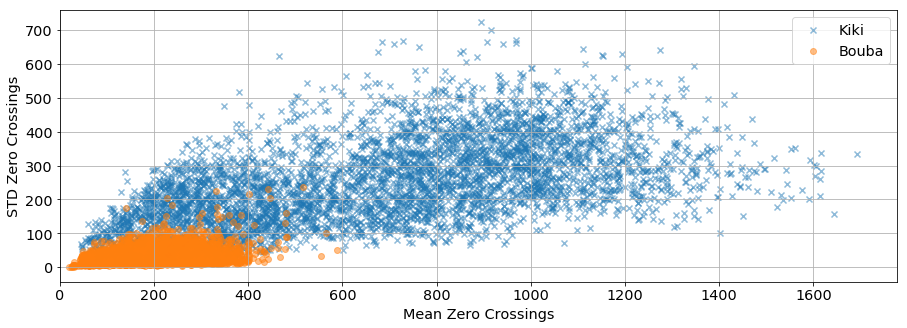

In [0]:
# Plot data
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(kiki_mean_train, kiki_sd_train, marker='x', label="Kiki",alpha=0.5)
ax.scatter(bouba_mean_train, bouba_sd_train, marker='o', label="Bouba", alpha=0.5)
ax.legend()
plt.gca().set_xlim(left=0)
plt.xlabel('Mean Zero Crossings')
plt.ylabel('STD Zero Crossings')
plt.grid()
plt.show()

8. You know what's next! Create a two-dimensional linear classifier with equal priors, and test it on these new features extracted from the training dataset and testing dataset. Summarize the performance with contingency tables and comment on the results, comparing with frame-wise classification experiments you ran in question 6.

In [0]:
# Extract features from test data
import pydub

root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
number_of_files = 100

# TEST DATA
# Kiki
kiki_mean_test = []
kiki_sd_test = []
for i in range(101,101+number_of_files):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_test/kiki/kiki_' + f"{i:04d}" + '.m4a')
  print('Processing file kiki_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  kiki_mean_test_tmp,kiki_sd_test_tmp = zero_crossings_mean_sd(samples,fs,fs*1)
  kiki_mean_test = np.concatenate((kiki_mean_test,kiki_mean_test_tmp))
  kiki_sd_test = np.concatenate((kiki_sd_test,kiki_sd_test_tmp))
#print(kiki_mean_test)
#print(kiki_sd_test)

# Bouba
bouba_mean_test = []
bouba_sd_test = []
for i in range(101,101+number_of_files):
  sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_test/bouba/bouba_' + f"{i:04d}" + '.m4a')
  print('Processing file bouba_' + f"{i:04d}" + '.m4a')
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  bouba_mean_test_tmp,bouba_sd_test_tmp = zero_crossings_mean_sd(samples,fs,fs*1)
  bouba_mean_test = np.concatenate((bouba_mean_test,bouba_mean_test_tmp))
  bouba_sd_test = np.concatenate((bouba_sd_test,bouba_sd_test_tmp))
#print(bouba_mean_test)
#print(bouba_sd_test)

In [0]:
# Save mean and standard deviation in csv file
if number_of_files == 100:
  np.savetxt(root_path + "Outputs/kiki_mean_test.csv", kiki_mean_test, delimiter=',')
  np.savetxt(root_path + "Outputs/kiki_sd_test.csv", kiki_sd_test, delimiter=',')
  np.savetxt(root_path + "Outputs/bouba_mean_test.csv", bouba_mean_test, delimiter=',')
  np.savetxt(root_path + "Outputs/bouba_sd_test.csv", bouba_sd_test, delimiter=',')

In [0]:
# Load mean and std zero crossing results from a csv
kiki_mean_test = np.genfromtxt(root_path + "Outputs/kiki_mean_test.csv", delimiter=",")
kiki_sd_test = np.genfromtxt(root_path + "Outputs/kiki_sd_test.csv", delimiter=",")
bouba_mean_test = np.genfromtxt(root_path + "Outputs/bouba_mean_test.csv", delimiter=",")
bouba_sd_test = np.genfromtxt(root_path + "Outputs/bouba_sd_test.csv", delimiter=",")

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Train data
kiki_mean_sd_train = np.vstack((kiki_mean_train,kiki_sd_train))
bouba_mean_sd_train = np.vstack((bouba_mean_train,bouba_sd_train))
X_train = np.concatenate((kiki_mean_sd_train,bouba_mean_sd_train),axis=1)
size_kiki_train = kiki_mean_sd_train.shape
size_bouba_train = bouba_mean_sd_train.shape
kiki_targuet_train = np.ones(size_kiki_train[1])
bouba_targuet_train = 2*np.ones(size_bouba_train[1])
y_train = np.concatenate((kiki_targuet_train,bouba_targuet_train))

# Test data
kiki_mean_sd_test = np.vstack((kiki_mean_test,kiki_sd_test))
bouba_mean_sd_test = np.vstack((bouba_mean_test,bouba_sd_test))
X_test = np.concatenate((kiki_mean_sd_test,bouba_mean_sd_test),axis=1)
size_kiki_test = kiki_mean_sd_test.shape
size_bouba_test = bouba_mean_sd_test.shape
kiki_targuet_test = np.ones(size_kiki_test[1])
bouba_targuet_test = 2*np.ones(size_bouba_test[1])
y_test = np.concatenate((kiki_targuet_test,bouba_targuet_test))

# Fit the model
clf = LinearDiscriminantAnalysis()
model_8 = clf.fit(np.transpose(X_train), y_train)

# Predict value training data
y_pred_train = model_8.predict(np.transpose(X_train))
cm_train = confusion_matrix(y_train, y_pred_train)
#print(cm_train)

# Predict value testing data
y_pred_test = model_8.predict(np.transpose(X_test))
cm_test = confusion_matrix(y_test, y_pred_test)
#print(cm_train)


# TRAININIG Compute performance metrics
kiki_predicted_correctly_train = cm_train[0,0]
kiki_predicted_incorrectly_train = cm_train[0,1]
bouba_predicted_correctly_train = cm_train[1,1]
bouba_predicted_incorrectly_train = cm_train[1,0]
kiki_predicted_correctly_train_perc = round((cm_train[0,0]/(cm_train[0,0]+cm_train[0,1]))*100,2)
kiki_predicted_incorrectly_train_perc = round((cm_train[0,1]/(cm_train[0,0]+cm_train[0,1]))*100,2)
bouba_predicted_correctly_train_perc = round((cm_train[1,1]/(cm_train[1,0]+cm_train[1,1]))*100,2)
bouba_predicted_incorrectly_train_perc = round((cm_train[1,0]/(cm_train[1,0]+cm_train[1,1]))*100,2)

# TESTING Compute performance metrics
kiki_predicted_correctly_test = cm_test[0,0]
kiki_predicted_incorrectly_test = cm_test[0,1]
bouba_predicted_correctly_test = cm_test[1,1]
bouba_predicted_incorrectly_test = cm_test[1,0]
kiki_predicted_correctly_test_perc = round((cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]))*100,2)
kiki_predicted_incorrectly_test_perc = round((cm_test[0,1]/(cm_test[0,0]+cm_test[0,1]))*100,2)
bouba_predicted_correctly_test_perc = round((cm_test[1,1]/(cm_test[1,0]+cm_test[1,1]))*100,2)
bouba_predicted_incorrectly_test_perc = round((cm_test[1,0]/(cm_test[1,0]+cm_test[1,1]))*100,2)

accuracy_win_test = round(accuracy_score(y_test, y_pred_test)*100,2)

# Print results
print('Global accuracy test dataset ' + str(accuracy_win_test) + '%')
# TRAINING PERFORMANCE TABLE
print(tabulate([['Kiki true',str(kiki_predicted_correctly_train) + '(' + str(kiki_predicted_correctly_train_perc) + '%)',str(kiki_predicted_incorrectly_train) + '(' + str(kiki_predicted_incorrectly_train_perc) + '%)'],
                ['Bouba true',str(bouba_predicted_incorrectly_train) + '(' + str(bouba_predicted_incorrectly_train_perc) + '%)',str(bouba_predicted_correctly_train) + '(' + str(bouba_predicted_correctly_train_perc) + '%)']],
                headers=['TRAINING DATA','Kiki predicted', 'Bouba predicted']))
print()
# TESTING PERFORMANCE TABLE
print(tabulate([['Kiki true',str(kiki_predicted_correctly_test) + '(' + str(kiki_predicted_correctly_test_perc) + '%)',str(kiki_predicted_incorrectly_test) + '(' + str(kiki_predicted_incorrectly_test_perc) + '%)'],
                ['Bouba true',str(bouba_predicted_incorrectly_test) + '(' + str(bouba_predicted_incorrectly_test_perc) + '%)',str(bouba_predicted_correctly_test) + '(' + str(bouba_predicted_correctly_test_perc) + '%)']],
                headers=['TESTING DATA','Kiki predicted', 'Bouba predicted']))


Global accuracy test dataset 90.69%
TRAINING DATA    Kiki predicted    Bouba predicted
---------------  ----------------  -----------------
Kiki true        3646(79.73%)      927(20.27%)
Bouba true       9(0.17%)          5317(99.83%)

TESTING DATA    Kiki predicted    Bouba predicted
--------------  ----------------  -----------------
Kiki true       3610(79.71%)      919(20.29%)
Bouba true      12(0.22%)         5455(99.78%)


Using the linear discriminant analysis model, the accuracy value has increased a 6.09 percent against the one obtained with the boundary discriminator approach. Furthemore, the linear discriminant analysis model provides with a parameter which can be tunned in order to improve the performance of the model. The value of the texture window with which the accuracy of the model is 99% is obtained below.

9. Finally, find the number of seconds that the texture window must be such that the accuracy of the resulting linear classification model is 99% in the testing dataset. Give the resulting confusion table for just the testing dataset.


In [0]:
# Extract features from train data
def extract_features_train(number_of_files=100,texture_win_sec=1):
  root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
  # TRAIN DATA
  # Kiki
  kiki_mean_train = []
  kiki_sd_train = []
  for i in range(1,number_of_files+1):
    sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_train/kiki/kiki_' + f"{i:04d}" + '.m4a')
    print('Processing file kiki_' + f"{i:04d}" + '.m4a')
    samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
    kiki_mean_train_tmp,kiki_sd_train_tmp = zero_crossings_mean_sd(samples,fs,fs*texture_win_sec)
    kiki_mean_train = np.concatenate((kiki_mean_train,kiki_mean_train_tmp))
    kiki_sd_train = np.concatenate((kiki_sd_train,kiki_sd_train_tmp))
  #print(kiki_mean_train)
  #print(kiki_sd_train)
  # Bouba
  bouba_mean_train = []
  bouba_sd_train = []
  for i in range(1,number_of_files+1):
    sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_train/bouba/bouba_' + f"{i:04d}" + '.m4a')
    print('Processing file bouba_' + f"{i:04d}" + '.m4a')
    samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
    bouba_mean_train_tmp,bouba_sd_train_tmp = zero_crossings_mean_sd(samples,fs,fs*texture_win_sec)
    bouba_mean_train = np.concatenate((bouba_mean_train,bouba_mean_train_tmp))
    bouba_sd_train = np.concatenate((bouba_sd_train,bouba_sd_train_tmp))
  #print(bouba_mean_train)
  #print(bouba_sd_train)
  return kiki_mean_train, kiki_sd_train, bouba_mean_train, bouba_sd_train

# Extract features from test data
def extract_features_test(number_of_files=100,texture_win_sec=1):
  root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
  # TEST DATA
  # Kiki
  kiki_mean_test = []
  kiki_sd_test = []
  for i in range(101,101+number_of_files):
    sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_test/kiki/kiki_' + f"{i:04d}" + '.m4a')
    print('Processing file kiki_' + f"{i:04d}" + '.m4a')
    samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
    kiki_mean_test_tmp,kiki_sd_test_tmp = zero_crossings_mean_sd(samples,fs,fs*texture_win_sec)
    kiki_mean_test = np.concatenate((kiki_mean_test,kiki_mean_test_tmp))
    kiki_sd_test = np.concatenate((kiki_sd_test,kiki_sd_test_tmp))
  #print(kiki_mean_test)
  #print(kiki_sd_test)
  # Bouba
  bouba_mean_test = []
  bouba_sd_test = []
  for i in range(101,101+number_of_files):
    sound = pydub.AudioSegment.from_file(root_path + 'KikiBoubadata/kikibouba_test/bouba/bouba_' + f"{i:04d}" + '.m4a')
    print('Processing file bouba_' + f"{i:04d}" + '.m4a')
    samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
    bouba_mean_test_tmp,bouba_sd_test_tmp = zero_crossings_mean_sd(samples,fs,fs*texture_win_sec)
    bouba_mean_test = np.concatenate((bouba_mean_test,bouba_mean_test_tmp))
    bouba_sd_test = np.concatenate((bouba_sd_test,bouba_sd_test_tmp))
  #print(bouba_mean_test)
  #print(bouba_sd_test)
  return kiki_mean_test, kiki_sd_test, bouba_mean_test, bouba_sd_test

def data_training_set(kiki_mean_train, kiki_sd_train, bouba_mean_train, bouba_sd_train):
  kiki_mean_sd_train = np.vstack((kiki_mean_train,kiki_sd_train))
  bouba_mean_sd_train = np.vstack((bouba_mean_train,bouba_sd_train))
  X_train = np.concatenate((kiki_mean_sd_train,bouba_mean_sd_train),axis=1)
  size_kiki_train = kiki_mean_sd_train.shape
  size_bouba_train = bouba_mean_sd_train.shape
  kiki_targuet_train = np.ones(size_kiki_train[1])
  bouba_targuet_train = 2*np.ones(size_bouba_train[1])
  y_train = np.concatenate((kiki_targuet_train,bouba_targuet_train))
  return X_train, y_train

def data_testing_set(kiki_mean_test, kiki_sd_test, bouba_mean_test, bouba_sd_test):
  kiki_mean_sd_test = np.vstack((kiki_mean_test,kiki_sd_test))
  bouba_mean_sd_test = np.vstack((bouba_mean_test,bouba_sd_test))
  X_test = np.concatenate((kiki_mean_sd_test,bouba_mean_sd_test),axis=1)
  size_kiki_test = kiki_mean_sd_test.shape
  size_bouba_test = bouba_mean_sd_test.shape
  kiki_targuet_test = np.ones(size_kiki_test[1])
  bouba_targuet_test = 2*np.ones(size_bouba_test[1])
  y_test = np.concatenate((kiki_targuet_test,bouba_targuet_test))
  return X_test, y_test

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy_best_win_test = 0
texture_win_sec = 10.5 # Optimal value
win_step = 0.25
num_files = 100
while(accuracy_best_win_test < 0.99):
  # Extract features from train data
  kiki_mean_train, kiki_sd_train, bouba_mean_train, bouba_sd_train = extract_features_train(num_files,texture_win_sec)
  X_train, y_train = data_training_set(kiki_mean_train, kiki_sd_train, bouba_mean_train, bouba_sd_train)
  
  # Fit the model
  clf = LinearDiscriminantAnalysis()
  model_9 = clf.fit(np.transpose(X_train), y_train)
  
  # Extract features from test data
  kiki_mean_test, kiki_sd_test, bouba_mean_test, bouba_sd_test = extract_features_test(num_files,texture_win_sec)
  X_test, y_test = data_testing_set(kiki_mean_test, kiki_sd_test, bouba_mean_test, bouba_sd_test)
      
  # Predict value testing data
  y_pred_test = model_9.predict(np.transpose(X_test))
  accuracy_best_win_test = accuracy_score(y_test, y_pred_test)
  print('Accuracy (win=' + str(texture_win_sec) + '): ' + str(round(accuracy_best_win_test*100,2)) + '%')
  texture_win_sec += win_step

Processing file kiki_0001.m4a
Processing file kiki_0002.m4a
Processing file kiki_0003.m4a
Processing file kiki_0004.m4a
Processing file kiki_0005.m4a
Processing file kiki_0006.m4a
Processing file kiki_0007.m4a
Processing file kiki_0008.m4a
Processing file kiki_0009.m4a
Processing file kiki_0010.m4a
Processing file kiki_0011.m4a
Processing file kiki_0012.m4a
Processing file kiki_0013.m4a
Processing file kiki_0014.m4a
Processing file kiki_0015.m4a
Processing file kiki_0016.m4a
Processing file kiki_0017.m4a
Processing file kiki_0018.m4a
Processing file kiki_0019.m4a
Processing file kiki_0020.m4a
Processing file kiki_0021.m4a
Processing file kiki_0022.m4a
Processing file kiki_0023.m4a
Processing file kiki_0024.m4a
Processing file kiki_0025.m4a
Processing file kiki_0026.m4a
Processing file kiki_0027.m4a
Processing file kiki_0028.m4a
Processing file kiki_0029.m4a
Processing file kiki_0030.m4a
Processing file kiki_0031.m4a
Processing file kiki_0032.m4a
Processing file kiki_0033.m4a
Processing

In [0]:
# TESTING Compute performance metrics
cm_test = confusion_matrix(y_test, y_pred_test)
kiki_predicted_correctly_test = cm_test[0,0]
kiki_predicted_incorrectly_test = cm_test[0,1]
bouba_predicted_correctly_test = cm_test[1,1]
bouba_predicted_incorrectly_test = cm_test[1,0]
kiki_predicted_correctly_test_perc = round((cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]))*100,2)
kiki_predicted_incorrectly_test_perc = round((cm_test[0,1]/(cm_test[0,0]+cm_test[0,1]))*100,2)
bouba_predicted_correctly_test_perc = round((cm_test[1,1]/(cm_test[1,0]+cm_test[1,1]))*100,2)
bouba_predicted_incorrectly_test_perc = round((cm_test[1,0]/(cm_test[1,0]+cm_test[1,1]))*100,2)


print('Global accuracy test dataset ' + str(round(accuracy_best_win_test*100,2)) + '%')
print(tabulate([['Kiki true',str(kiki_predicted_correctly_test) + '(' + str(kiki_predicted_correctly_test_perc) + '%)',str(kiki_predicted_incorrectly_test) + '(' + str(kiki_predicted_incorrectly_test_perc) + '%)'],
                ['Bouba true',str(bouba_predicted_incorrectly_test) + '(' + str(bouba_predicted_incorrectly_test_perc) + '%)',str(bouba_predicted_correctly_test) + '(' + str(bouba_predicted_correctly_test_perc) + '%)']],
                headers=['TESTING DATA','Kiki predicted', 'Bouba predicted']))

Global accuracy test dataset 99.08%
TESTING DATA    Kiki predicted    Bouba predicted
--------------  ----------------  -----------------
Kiki true       381(97.94%)       8(2.06%)
Bouba true      0(0.0%)           476(100.0%)


10. Finally finally, using the model you built in #8, create a classifier that will make a decision for an *audio file* based on a majority vote of the classifications of all features extracted from that file. Give the resulting confusion table for just the testing dataset.

In [0]:
import pydub

def kiki_or_bouba(file_path, texture_window=10.5):
  sound = pydub.AudioSegment.from_file(file_path)
  samples = sound.get_array_of_samples() # Return the raw audio data as an array of (numeric) samples
  normalized_samples = [(ele/2**16.)*2 for ele in samples] # Normalize the 16-bit track, samples is now normalized [-1,1]
  fs = sound.frame_rate # Get the sampling frequency
  
  if sound.channels > 1:
    samples_l = normalized_samples[::2]   # Left channel
    samples_r = normalized_samples[1::2]  # Right channel
    samples = samples_l                   # We look at left channel
  
  mean,sd = zero_crossings_mean_sd(samples,fs,fs*texture_window)
  X_file = np.vstack((mean,sd))

  y_pred = model_8.predict(np.transpose(X_file))

  if(((y_pred == 1).sum()) > len(y_pred)/2):
    #print('It is a kiki song')
    return 'kiki'
  elif(((y_pred == 2).sum()) > len(y_pred)/2):
    #print('It is a bouba song')
    return 'bouba'
  else:
    print('Sorry :( we have not been able to classify this audio file')
    return 'null'

In [0]:
root_path = 'gdrive/My Drive/KTH/DT2470/Lab_01/'
number_of_files = 100
audio_pred_kiki = np.empty([number_of_files], dtype="S5")
audio_pred_bouba = np.empty([number_of_files], dtype="S5")
for i in range(101,101+number_of_files):
  print('Processing file kiki_' + f"{i:04d}" + '.m4a')
  audio_pred_kiki[i-101] = kiki_or_bouba(root_path + 'KikiBoubadata/kikibouba_test/kiki/kiki_' + f"{i:04d}" + '.m4a')
  print('Processing file bouba_' + f"{i:04d}" + '.m4a')
  audio_pred_bouba[i-101] = kiki_or_bouba(root_path + 'KikiBoubadata/kikibouba_test/bouba/bouba_' + f"{i:04d}" + '.m4a')
    

In [0]:
# TESTING Compute performance metrics
kiki_predicted_correctly_test = np.sum(audio_pred_kiki == b'kiki')
kiki_predicted_incorrectly_test = np.sum(audio_pred_kiki != b'kiki')
bouba_predicted_correctly_test = np.sum(audio_pred_bouba == b'bouba')
bouba_predicted_incorrectly_test = np.sum(audio_pred_bouba != b'bouba')
kiki_predicted_correctly_test_perc = round((kiki_predicted_correctly_test/(kiki_predicted_correctly_test+kiki_predicted_incorrectly_test))*100,2)
kiki_predicted_incorrectly_test_perc = round((kiki_predicted_incorrectly_test/(kiki_predicted_correctly_test+kiki_predicted_incorrectly_test))*100,2)
bouba_predicted_correctly_test_perc = round((bouba_predicted_correctly_test/(bouba_predicted_correctly_test+bouba_predicted_incorrectly_test))*100,2)
bouba_predicted_incorrectly_test_perc = round((bouba_predicted_incorrectly_test/(bouba_predicted_correctly_test+bouba_predicted_incorrectly_test))*100,2)
accuracy_last_win_test = round(((bouba_predicted_correctly_test+bouba_predicted_correctly_test_perc)/(len(audio_pred_kiki)+len(audio_pred_bouba)))*100,2)

# Print results
print('Global accuracy test dataset ' + str(accuracy_last_win_test) + '%')
# Plot confusion table
print(tabulate([['Kiki true',str(kiki_predicted_correctly_test) + '(' + str(kiki_predicted_correctly_test_perc) + '%)',str(kiki_predicted_incorrectly_test) + '(' + str(kiki_predicted_incorrectly_test_perc) + '%)'],
                ['Bouba true',str(bouba_predicted_incorrectly_test) + '(' + str(bouba_predicted_incorrectly_test_perc) + '%)',str(bouba_predicted_correctly_test) + '(' + str(bouba_predicted_correctly_test_perc) + '%)']],
                headers=['TESTING DATA','Kiki predicted', 'Bouba predicted']))

Global accuracy test dataset 100.0%
TESTING DATA    Kiki predicted    Bouba predicted
--------------  ----------------  -----------------
Kiki true       100(100.0%)       0(0.0%)
Bouba true      0(0.0%)           100(100.0%)


Finally, using the the above classifier based on majority vote the global accuracy of the model reaches 100%!


---


